1. Gerekli kütüphaneler

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

2. Veriyi okuma

In [16]:
# Veriyi oku
train_df = pd.read_csv("datasets/processed_train_data.csv")
test_df = pd.read_csv("datasets/processed_test_data.csv")

# Özellik ve hedef ayır
X_train = train_df.drop(columns=["Thyroid_Cancer_Risk"])
y_train = train_df["Thyroid_Cancer_Risk"]

X_test = test_df.drop(columns=["Thyroid_Cancer_Risk"])
y_test = test_df["Thyroid_Cancer_Risk"]

3. Özellikleri aynı aralığa çekme

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4. En iyi özellikleri seçme

In [18]:
selector = SelectKBest(score_func=f_regression, k=10) 
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

5. Model eğitme

In [19]:
model = LinearRegression()
model.fit(X_train_selected, y_train)

y_pred = model.predict(X_test_selected)

6. Tahmin ve metrik hesaplama

In [20]:
# Performans metrikleri
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Skoru: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

R² Skoru: 0.2206
MSE: 0.4139
MAE: 0.5706


7. Tahmin sonuçlarının görselleştirilmesi

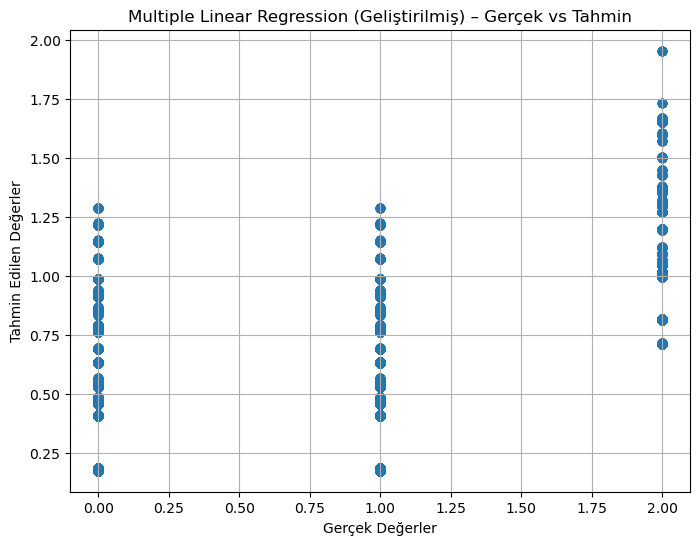

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.title("Multiple Linear Regression (Geliştirilmiş) – Gerçek vs Tahmin")
plt.grid(True)
plt.show()

8. Katsayılarının yazılması

In [24]:
selected_columns = X_train.columns[selector.get_support()]

coefficients = pd.DataFrame({
    'Özellik': selected_columns,
    'Katsayı': model.coef_
})
print(coefficients.sort_values(by='Katsayı', ascending=False))

                    Özellik   Katsayı
0            Family_History  0.174635
4             Country_India  0.142392
2         Iodine_Deficiency  0.122833
1        Radiation_Exposure  0.108275
6           Ethnicity_Asian  0.096644
5           Country_Nigeria  0.001872
3             Country_China -0.000039
9  Ethnicity_Middle Eastern -0.068697
8        Ethnicity_Hispanic -0.083159
7       Ethnicity_Caucasian -0.104879
